In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


drive_mount = False
if drive_mount:
    from google.colab import drive
    drive.mount('/content/drive/')
    DATA_DIR = "/content/drive/MyDrive/Colab_Notebooks/COMP0036/datasets"
else:
    DATA_DIR = "../datasets"
EPL_TRAINING_DATA_CSV = DATA_DIR + "/epl-training.csv"


# Read the CSV file
epl_training_df = pd.read_csv(EPL_TRAINING_DATA_CSV)
epl_training_df['Date'] = pd.to_datetime(epl_training_df['Date'], format='mixed', dayfirst=True)
epl_processed_df = epl_training_df.copy()
epl_training_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HY,AY,HR,AR,HomeTeamExpenditure,HomeTeamIncome,HomeTeamBalance,AwayTeamExpenditure,AwayTeamIncome,AwayTeamBalance
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,1.0,2.0,0.0,0.0,20.80,0.532,-20.27,20.28,1.460,-18.810
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,1.0,2.0,0.0,0.0,52.39,37.720,-14.67,18.65,42.400,23.750
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,5.0,3.0,1.0,0.0,19.00,26.280,7.28,33.47,10.000,-23.470
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,1.0,1.0,0.0,0.0,13.33,6.880,-6.45,0.00,0.145,0.145
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,1.0,3.0,0.0,0.0,53.15,12.330,-40.82,34.48,35.550,1.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835,2023-10-29,West Ham,Everton,0.0,1.0,A,0.0,0.0,D,S Attwell,...,4.0,1.0,0.0,0.0,137.56,156.400,18.84,40.50,82.800,42.300
8836,2023-10-29,Aston Villa,Luton,3.0,1.0,H,1.0,0.0,H,J Brooks,...,3.0,2.0,0.0,0.0,93.00,32.550,-60.45,22.75,0.000,-22.750
8837,2023-10-29,Brighton,Fulham,1.0,1.0,D,1.0,0.0,H,M Salisbury,...,0.0,3.0,0.0,0.0,100.35,195.900,95.55,68.47,52.600,-15.870
8838,2023-10-29,Liverpool,Nott'm Forest,3.0,0.0,H,2.0,0.0,H,C Salisbury,...,2.0,3.0,0.0,0.0,172.00,60.700,-111.30,122.05,64.820,-57.230


In [48]:
epl_training_df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF',
       'HY', 'AY', 'HR', 'AR', 'HomeTeamExpenditure', 'HomeTeamIncome',
       'HomeTeamBalance', 'AwayTeamExpenditure', 'AwayTeamIncome',
       'AwayTeamBalance'],
      dtype='object')

# Feature Engineering

## Rest time

In [49]:
last_match_time = {}


def calculate_time_difference(row):
    home_team = row["HomeTeam"]
    away_team = row["AwayTeam"]

    home_rest_time = 0
    away_rest_time = 0

    # Check if the teams have played a match before
    if home_team in last_match_time:
        last_time = last_match_time[home_team]
        time_diff = row["Date"] - last_time
        home_rest_time = time_diff.days
        last_match_time[home_team] = row["Date"]
    else:
        last_match_time[home_team] = row["Date"]

    if away_team in last_match_time:
        last_time = last_match_time[away_team]
        time_diff = row["Date"] - last_time
        away_rest_time = time_diff.days
        last_match_time[away_team] = row["Date"]
    else:
        last_match_time[away_team] = row["Date"]

    return pd.Series([home_rest_time, away_rest_time])


# Apply the function and store the result in a temporary DataFrame
result = epl_processed_df.apply(calculate_time_difference, axis=1)

# Rename the columns of the result DataFrame
result.columns = ["home_rest_time", "away_rest_time"]

# Concatenate the original DataFrame and the result DataFrame
epl_processed_df = pd.concat([epl_processed_df, result], axis=1)

epl_processed_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HR,AR,HomeTeamExpenditure,HomeTeamIncome,HomeTeamBalance,AwayTeamExpenditure,AwayTeamIncome,AwayTeamBalance,home_rest_time,away_rest_time
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,0.0,0.0,20.80,0.532,-20.27,20.28,1.460,-18.810,0,0
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,0.0,0.0,52.39,37.720,-14.67,18.65,42.400,23.750,0,0
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,1.0,0.0,19.00,26.280,7.28,33.47,10.000,-23.470,0,0
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,0.0,0.0,13.33,6.880,-6.45,0.00,0.145,0.145,0,0
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,0.0,0.0,53.15,12.330,-40.82,34.48,35.550,1.070,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835,2023-10-29,West Ham,Everton,0.0,1.0,A,0.0,0.0,D,S Attwell,...,0.0,0.0,137.56,156.400,18.84,40.50,82.800,42.300,7,8
8836,2023-10-29,Aston Villa,Luton,3.0,1.0,H,1.0,0.0,H,J Brooks,...,0.0,0.0,93.00,32.550,-60.45,22.75,0.000,-22.750,7,8
8837,2023-10-29,Brighton,Fulham,1.0,1.0,D,1.0,0.0,H,M Salisbury,...,0.0,0.0,100.35,195.900,95.55,68.47,52.600,-15.870,8,6
8838,2023-10-29,Liverpool,Nott'm Forest,3.0,0.0,H,2.0,0.0,H,C Salisbury,...,0.0,0.0,172.00,60.700,-111.30,122.05,64.820,-57.230,8,8


## History

In [50]:
def calculate_rolling_averages(df, n=5, n_same_team=2):
    # Columns to exclude
    exclude_columns = [
        "HTR",
        "FTR",
        "Date",
        "HomeTeam",
        "AwayTeam",
        "Referee", 'HomeTeamExpenditure', 'HomeTeamIncome',
        'HomeTeamBalance', 'AwayTeamExpenditure', 'AwayTeamIncome',
        'AwayTeamBalance', 'HomeRestTime', 'AwayRestTime'
    ]

    # Columns to calculate rolling averages for
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    columns_to_calculate = [
        col for col in numeric_columns if col not in exclude_columns
    ]

    # Sort the DataFrame by Date
    df = df.sort_values(by="Date")

    # Calculate rolling mean for the last n matches for each team
    for col in columns_to_calculate:
        home_col_name = f"Home{col}_all_avg_{n}"
        away_col_name = f"Away{col}_all_avg_{n}"

        df[home_col_name] = df.groupby("HomeTeam")[col].transform(
            lambda x: x.rolling(window=n, min_periods=n).mean().shift()
        )
        df[away_col_name] = df.groupby("AwayTeam")[col].transform(
            lambda x: x.rolling(window=n, min_periods=n).mean().shift()
        )

    for col in columns_to_calculate:
        home_col_name = f"Home{col}_same_avg_{n_same_team}"
        away_col_name = f"Away{col}_same_avg_{n_same_team}"
        if col in ["FTHG", "HTHG", "HS", "HST", "HC", "HF", "HY", "HR"]:
            df[home_col_name] = df.groupby(["HomeTeam", "AwayTeam"])[col].transform(
                lambda x: x.rolling(window=n_same_team, min_periods=n_same_team)
                .mean()
                .shift()
            )
        else:
            df[away_col_name] = df.groupby(["AwayTeam", "HomeTeam"])[col].transform(
                lambda x: x.rolling(window=n_same_team, min_periods=n_same_team)
                .mean()
                .shift()
            )

    return df


# Update the DataFrame
N = 25
N_same_team = 2
df = calculate_rolling_averages(epl_processed_df, n=N, n_same_team=N_same_team)
del_columns = [
    "FTHG",
    "FTAG",
    "HTHG",
    "HTAG",
    "HTR",
    "Referee",
    "HS",
    "AS",
    "HST",
    "AST",
    "HC",
    "AC",
    "HF",
    "AF",
    "HY",
    "AY",
    "HR",
    "AR",
]
df = df.drop(del_columns, axis=1)

df

,Date,HomeTeam,AwayTeam,FTR,HomeTeamExpenditure,HomeTeamIncome,HomeTeamBalance,AwayTeamExpenditure,AwayTeamIncome,AwayTeamBalance,...,HomeHC_same_avg_2,AwayAC_same_avg_2,HomeHF_same_avg_2,AwayAF_same_avg_2,HomeHY_same_avg_2,AwayAY_same_avg_2,HomeHR_same_avg_2,AwayAR_same_avg_2,Awayhome_rest_time_same_avg_2,Awayaway_rest_time_same_avg_2
0,2000-08-19,Charlton,Man City,H,20.80,0.532,-20.27,20.28,1.460,-18.810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-08-19,Chelsea,West Ham,H,52.39,37.720,-14.67,18.65,42.400,23.750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-08-19,Coventry,Middlesbrough,A,19.00,26.280,7.28,33.47,10.000,-23.470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-08-19,Derby,Southampton,D,13.33,6.880,-6.45,0.00,0.145,0.145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-08-19,Leeds,Everton,H,53.15,12.330,-40.82,34.48,35.550,1.070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,2023-10-29,Brighton,Fulham,D,100.35,195.900,95.55,68.47,52.600,-15.870,...,10.0,1.0,11.0,14.0,1.0,3.0,0.0,0.0,9.0,7.0
8838,2023-10-29,Liverpool,Nott'm Forest,H,172.00,60.700,-111.30,122.05,64.820,-57.230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8835,2023-10-29,West Ham,Everton,A,137.56,156.400,18.84,40.50,82.800,42.300,...,3.0,6.5,9.0,9.0,1.0,1.0,0.0,0.5,10.5,12.0
8836,2023-10-29,Aston Villa,Luton,H,93.00,32.550,-60.45,22.75,0.000,-22.750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
epl_processed_df = df.copy()

## ELO Rating

In [52]:
import pandas as pd

# Define a function to calculate the expected outcome of the match
def calculate_expected_score(ra, rb):
    return 1 / (1 + 10 ** ((rb - ra) / 400))

# Define a function to update the Elo rating
def update_elo(ra, rb, score, k=30):
    ea = calculate_expected_score(ra, rb)
    eb = calculate_expected_score(rb, ra)
    new_ra = ra + k * (score - ea)
    new_rb = rb + k * ((1 - score) - eb)
    return new_ra, new_rb

# Initialize a dictionary to store Elo scores for each team
elo_dict = {}

# Function to calculate Elo deltas
def calculate_elo_deltas(team, num_games):
    if team not in elo_history or len(elo_history[team]) < num_games:
        return 0  # Not enough history
    return elo_history[team][-2] - elo_history[team][-num_games-2]

# Initialize a dictionary to store Elo history for each team
elo_history = {}

# This function will be called for each row in the dataframe to update the Elo scores
def process_row(row, include_elo_deltas=False):
    home_team, away_team = row['HomeTeam'], row['AwayTeam']
    ftr = row['FTR']
    # Initialize teams with an Elo score of 1500 if they don't have one already
    if home_team not in elo_dict:
        elo_dict[home_team] = 1500
    if away_team not in elo_dict:
        elo_dict[away_team] = 1500

    # Determine match outcome for Elo calculation (1 = home win, 0.5 = draw, 0 = away win)
    if ftr == 'H':
        score = 1
    elif ftr == 'A':
        score = 0
    else:
        score = 0.5

    # Update Elo scores
    curr_home_elo, curr_away_elo = elo_dict[home_team], elo_dict[away_team]
    elo_diff = curr_home_elo - curr_away_elo
    new_home_elo, new_away_elo = update_elo(curr_home_elo, curr_away_elo, score)
    elo_dict[home_team], elo_dict[away_team] = new_home_elo, new_away_elo

    # Update Elo history
    elo_history.setdefault(home_team, [1500] * 11).append(new_home_elo)
    elo_history.setdefault(away_team, [1500] * 11).append(new_away_elo)

    # Calculate Elo deltas
    home_elo_deltas = [calculate_elo_deltas(home_team, i) for i in [1, 5, 10]]
    away_elo_deltas = [calculate_elo_deltas(away_team, i) for i in [1, 5, 10]]

    if include_elo_deltas:
        return pd.Series([new_home_elo, new_away_elo] + [curr_home_elo, curr_away_elo, elo_diff] + home_elo_deltas + away_elo_deltas)
    else:
        return pd.Series([new_home_elo, new_away_elo] + [curr_home_elo, curr_away_elo, elo_diff])

# Example usage:
# Assuming `matches_df` is your dataframe with historical match information
columns = ['AfterMatchHomeElo', 'AfterMatchAwayElo', 'HomeElo', 'AwayElo', 'EloDiff']
epl_processed_df[columns] = epl_processed_df.apply(process_row, axis=1)
elo_df = epl_processed_df[columns + ["FTR"]].drop(['AfterMatchHomeElo', 'AfterMatchAwayElo'], axis=1)

# target_column = 'FTR'
# label_encoder = LabelEncoder()
# elo_df[target_column] = label_encoder.fit_transform(elo_df[target_column])

elo_df

,HomeElo,AwayElo,EloDiff,FTR
0,1500.000000,1500.000000,0.000000,H
1,1500.000000,1500.000000,0.000000,H
2,1500.000000,1500.000000,0.000000,A
3,1500.000000,1500.000000,0.000000,D
4,1500.000000,1500.000000,0.000000,H
...,...,...,...,...
8837,1654.830595,1540.074128,114.756466,D
8838,1760.063825,1524.257614,235.806211,H
8835,1569.364767,1484.013329,85.351438,A
8836,1689.671042,1454.968736,234.702306,H


In [53]:
epl_processed_df = epl_processed_df.drop(['AfterMatchHomeElo', 'AfterMatchAwayElo'], axis=1, errors='ignore')
epl_processed_df

,Date,HomeTeam,AwayTeam,FTR,HomeTeamExpenditure,HomeTeamIncome,HomeTeamBalance,AwayTeamExpenditure,AwayTeamIncome,AwayTeamBalance,...,AwayAF_same_avg_2,HomeHY_same_avg_2,AwayAY_same_avg_2,HomeHR_same_avg_2,AwayAR_same_avg_2,Awayhome_rest_time_same_avg_2,Awayaway_rest_time_same_avg_2,HomeElo,AwayElo,EloDiff
0,2000-08-19,Charlton,Man City,H,20.80,0.532,-20.27,20.28,1.460,-18.810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.000000
1,2000-08-19,Chelsea,West Ham,H,52.39,37.720,-14.67,18.65,42.400,23.750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.000000
2,2000-08-19,Coventry,Middlesbrough,A,19.00,26.280,7.28,33.47,10.000,-23.470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.000000
3,2000-08-19,Derby,Southampton,D,13.33,6.880,-6.45,0.00,0.145,0.145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.000000
4,2000-08-19,Leeds,Everton,H,53.15,12.330,-40.82,34.48,35.550,1.070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.000000,1500.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,2023-10-29,Brighton,Fulham,D,100.35,195.900,95.55,68.47,52.600,-15.870,...,14.0,1.0,3.0,0.0,0.0,9.0,7.0,1654.830595,1540.074128,114.756466
8838,2023-10-29,Liverpool,Nott'm Forest,H,172.00,60.700,-111.30,122.05,64.820,-57.230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1760.063825,1524.257614,235.806211
8835,2023-10-29,West Ham,Everton,A,137.56,156.400,18.84,40.50,82.800,42.300,...,9.0,1.0,1.0,0.0,0.5,10.5,12.0,1569.364767,1484.013329,85.351438
8836,2023-10-29,Aston Villa,Luton,H,93.00,32.550,-60.45,22.75,0.000,-22.750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1689.671042,1454.968736,234.702306


## Win/Loss Streak

In [54]:
import pandas as pd

def add_win_loss_streaks(df):
    # Initialize columns
    df['HomeWinStreak'] = 0
    df['HomeLossStreak'] = 0
    df['AwayWinStreak'] = 0
    df['AwayLossStreak'] = 0

    # Create mappings for results
    home_result_mapping = {'H': 'W', 'A': 'L', 'D': 'D'}
    away_result_mapping = {'H': 'L', 'A': 'W', 'D': 'D'}

    # Track streaks for each team
    streaks = {team: {'win': 0, 'loss': 0} for team in pd.concat([df['HomeTeam'], df['AwayTeam']]).unique()}

    # Iterate over rows to calculate the streaks
    for index, row in df.iterrows():
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']

        # Assign the calculated streaks to the DataFrame
        df.at[index, 'HomeWinStreak'] = streaks[home_team]['win']
        df.at[index, 'HomeLossStreak'] = streaks[home_team]['loss']
        df.at[index, 'AwayWinStreak'] = streaks[away_team]['win']
        df.at[index, 'AwayLossStreak'] = streaks[away_team]['loss']

        # Update streaks based on the current row's result
        home_result = home_result_mapping[row['FTR']]
        away_result = away_result_mapping[row['FTR']]

        if home_result == 'W':
            streaks[home_team]['win'] += 1
            streaks[home_team]['loss'] = 0
        elif home_result == 'L':
            streaks[home_team]['win'] = 0
            streaks[home_team]['loss'] += 1
        else:
            streaks[home_team]['win'] = 0
            streaks[home_team]['loss'] = 0

        if away_result == 'W':
            streaks[away_team]['win'] += 1
            streaks[away_team]['loss'] = 0
        elif away_result == 'L':
            streaks[away_team]['win'] = 0
            streaks[away_team]['loss'] += 1
        else:
            streaks[away_team]['win'] = 0
            streaks[away_team]['loss'] = 0

    return df

# Example usage:
# df = pd.read_csv('your_data.csv')
epl_processed_df = add_win_loss_streaks(epl_processed_df)
epl_processed_df

,Date,HomeTeam,AwayTeam,FTR,HomeTeamExpenditure,HomeTeamIncome,HomeTeamBalance,AwayTeamExpenditure,AwayTeamIncome,AwayTeamBalance,...,AwayAR_same_avg_2,Awayhome_rest_time_same_avg_2,Awayaway_rest_time_same_avg_2,HomeElo,AwayElo,EloDiff,HomeWinStreak,HomeLossStreak,AwayWinStreak,AwayLossStreak
0,2000-08-19,Charlton,Man City,H,20.80,0.532,-20.27,20.28,1.460,-18.810,...,NaN,NaN,NaN,1500.000000,1500.000000,0.000000,0,0,0,0
1,2000-08-19,Chelsea,West Ham,H,52.39,37.720,-14.67,18.65,42.400,23.750,...,NaN,NaN,NaN,1500.000000,1500.000000,0.000000,0,0,0,0
2,2000-08-19,Coventry,Middlesbrough,A,19.00,26.280,7.28,33.47,10.000,-23.470,...,NaN,NaN,NaN,1500.000000,1500.000000,0.000000,0,0,0,0
3,2000-08-19,Derby,Southampton,D,13.33,6.880,-6.45,0.00,0.145,0.145,...,NaN,NaN,NaN,1500.000000,1500.000000,0.000000,0,0,0,0
4,2000-08-19,Leeds,Everton,H,53.15,12.330,-40.82,34.48,35.550,1.070,...,NaN,NaN,NaN,1500.000000,1500.000000,0.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,2023-10-29,Brighton,Fulham,D,100.35,195.900,95.55,68.47,52.600,-15.870,...,0.0,9.0,7.0,1654.830595,1540.074128,114.756466,0,1,0,1
8838,2023-10-29,Liverpool,Nott'm Forest,H,172.00,60.700,-111.30,122.05,64.820,-57.230,...,NaN,NaN,NaN,1760.063825,1524.257614,235.806211,1,0,0,0
8835,2023-10-29,West Ham,Everton,A,137.56,156.400,18.84,40.50,82.800,42.300,...,0.5,10.5,12.0,1569.364767,1484.013329,85.351438,0,1,0,1
8836,2023-10-29,Aston Villa,Luton,H,93.00,32.550,-60.45,22.75,0.000,-22.750,...,NaN,NaN,NaN,1689.671042,1454.968736,234.702306,1,0,0,0


## Season

In [55]:
import pandas as pd

mapping = {
    'Arsenal': 'Arsenal',
    'Aston Villa': 'Aston Villa',
    'Barnsley': None,  # No direct match in the first list
    'Birmingham City': 'Birmingham',
    'Blackburn': 'Blackburn',
    'Blackpool': 'Blackpool',
    'Bolton': 'Bolton',
    'Bournemouth': 'Bournemouth',
    'Bradford City': 'Bradford',
    'Brentford': 'Brentford',
    'Brighton': 'Brighton',
    'Burnley': 'Burnley',
    'Cardiff City': 'Cardiff',
    'Charlton Ath': 'Charlton',
    'Chelsea': 'Chelsea',
    'Coventry City': 'Coventry',
    'Crystal Palace': 'Crystal Palace',
    'Derby County': 'Derby',
    'Everton': 'Everton',
    'Fulham': 'Fulham',
    'Huddersfield': 'Huddersfield',
    'Hull City': 'Hull',
    'Ipswich Town': 'Ipswich',
    'Leeds United': 'Leeds',
    'Leicester City': 'Leicester',
    'Liverpool': 'Liverpool',
    'Manchester City': 'Man City',
    'Manchester Utd': 'Man United',
    'Middlesbrough': 'Middlesbrough',
    'Newcastle Utd': 'Newcastle',
    'Norwich City': 'Norwich',
    "Nott'ham Forest": "Nott'm Forest",
    'Oldham Athletic': None,  # No direct match in the first list
    'Portsmouth': 'Portsmouth',
    'QPR': 'QPR',
    'Reading': 'Reading',
    'Sheffield Utd': 'Sheffield United',
    'Sheffield Weds': None,  # No direct match in the first list
    'Southampton': 'Southampton',
    'Stoke City': 'Stoke',
    'Sunderland': 'Sunderland',
    'Swansea City': 'Swansea',
    'Swindon Town': None,  # No direct match in the first list
    'Tottenham': 'Tottenham',
    'Watford': 'Watford',
    'West Brom': 'West Brom',
    'West Ham': 'West Ham',
    'Wigan Athletic': 'Wigan',
    'Wimbledon': None,  # No direct match in the first list
    'Wolves': 'Wolves'
}


# Load the original DataFrame
df_original = epl_processed_df.copy()

# Load the premier-league-tables.csv DataFrame
df_tables = pd.read_csv('../datasets/premier-league-tables.csv')
df_tables['Team'] = df_tables['Team'].map(mapping)
# Convert 'Date' column to datetime in df_original if it's not already
df_original['Date'] = pd.to_datetime(df_original['Date'])

# Extract year from the 'Date' column
df_original['Year'] = df_original['Date'].dt.year

# Rename columns in df_tables for merging with HomeTeam
df_tables_home = df_tables.copy()
home_columns = {col: f"{col}_Home" for col in df_tables.columns if col not in ['Year']}
df_tables_home.rename(columns=home_columns, inplace=True)

# Merge with HomeTeam data
df_original = df_original.merge(df_tables_home, left_on=['HomeTeam', 'Year'], right_on=['Team_Home', 'Year'], how='left')

# Rename columns in df_tables for merging with AwayTeam
df_tables_away = df_tables.copy()
away_columns = {col: f"{col}_Away" for col in df_tables.columns if col not in ['Year']}
df_tables_away.rename(columns=away_columns, inplace=True)

# Merge with AwayTeam data
df_original = df_original.merge(df_tables_away, left_on=['AwayTeam', 'Year'], right_on=['Team_Away', 'Year'], how='left')
# df_original.drop(['Team_Home', 'Team_Away'], axis=1, inplace=True)
# Drop the 'Team' columns if no longer needed
# df_original.drop(columns=['Team_Home', 'Team_Away'], inplace=True)

# Now df_original contains additional columns for historical performance metrics of both Home and Away teams
df_original


,Date,HomeTeam,AwayTeam,FTR,HomeTeamExpenditure,HomeTeamIncome,HomeTeamBalance,AwayTeamExpenditure,AwayTeamIncome,AwayTeamBalance,...,Pts_Home,Team_Away,Rk_Away,W_Away,D_Away,L_Away,GF_Away,GA_Away,GD_Away,Pts_Away
0,2000-08-19,Charlton,Man City,H,20.80,0.532,-20.27,20.28,1.460,-18.810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-08-19,Chelsea,West Ham,H,52.39,37.720,-14.67,18.65,42.400,23.750,...,65.0,West Ham,9.0,15.0,10.0,13.0,52.0,53.0,-1.0,55.0
2,2000-08-19,Coventry,Middlesbrough,A,19.00,26.280,7.28,33.47,10.000,-23.470,...,44.0,Middlesbrough,12.0,14.0,10.0,14.0,46.0,52.0,-6.0,52.0
3,2000-08-19,Derby,Southampton,D,13.33,6.880,-6.45,0.00,0.145,0.145,...,38.0,Southampton,15.0,12.0,8.0,18.0,45.0,62.0,-17.0,44.0
4,2000-08-19,Leeds,Everton,H,53.15,12.330,-40.82,34.48,35.550,1.070,...,69.0,Everton,13.0,12.0,14.0,12.0,59.0,49.0,10.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835,2023-10-29,Brighton,Fulham,D,100.35,195.900,95.55,68.47,52.600,-15.870,...,62.0,Fulham,10.0,15.0,7.0,16.0,55.0,53.0,2.0,52.0
8836,2023-10-29,Liverpool,Nott'm Forest,H,172.00,60.700,-111.30,122.05,64.820,-57.230,...,67.0,Nott'm Forest,16.0,9.0,11.0,18.0,38.0,68.0,-30.0,38.0
8837,2023-10-29,West Ham,Everton,A,137.56,156.400,18.84,40.50,82.800,42.300,...,40.0,Everton,17.0,8.0,12.0,18.0,34.0,57.0,-23.0,36.0
8838,2023-10-29,Aston Villa,Luton,H,93.00,32.550,-60.45,22.75,0.000,-22.750,...,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
epl_processed_df = df_original.copy()
epl_processed_df

,Date,HomeTeam,AwayTeam,FTR,HomeTeamExpenditure,HomeTeamIncome,HomeTeamBalance,AwayTeamExpenditure,AwayTeamIncome,AwayTeamBalance,...,Pts_Home,Team_Away,Rk_Away,W_Away,D_Away,L_Away,GF_Away,GA_Away,GD_Away,Pts_Away
0,2000-08-19,Charlton,Man City,H,20.80,0.532,-20.27,20.28,1.460,-18.810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-08-19,Chelsea,West Ham,H,52.39,37.720,-14.67,18.65,42.400,23.750,...,65.0,West Ham,9.0,15.0,10.0,13.0,52.0,53.0,-1.0,55.0
2,2000-08-19,Coventry,Middlesbrough,A,19.00,26.280,7.28,33.47,10.000,-23.470,...,44.0,Middlesbrough,12.0,14.0,10.0,14.0,46.0,52.0,-6.0,52.0
3,2000-08-19,Derby,Southampton,D,13.33,6.880,-6.45,0.00,0.145,0.145,...,38.0,Southampton,15.0,12.0,8.0,18.0,45.0,62.0,-17.0,44.0
4,2000-08-19,Leeds,Everton,H,53.15,12.330,-40.82,34.48,35.550,1.070,...,69.0,Everton,13.0,12.0,14.0,12.0,59.0,49.0,10.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835,2023-10-29,Brighton,Fulham,D,100.35,195.900,95.55,68.47,52.600,-15.870,...,62.0,Fulham,10.0,15.0,7.0,16.0,55.0,53.0,2.0,52.0
8836,2023-10-29,Liverpool,Nott'm Forest,H,172.00,60.700,-111.30,122.05,64.820,-57.230,...,67.0,Nott'm Forest,16.0,9.0,11.0,18.0,38.0,68.0,-30.0,38.0
8837,2023-10-29,West Ham,Everton,A,137.56,156.400,18.84,40.50,82.800,42.300,...,40.0,Everton,17.0,8.0,12.0,18.0,34.0,57.0,-23.0,36.0
8838,2023-10-29,Aston Villa,Luton,H,93.00,32.550,-60.45,22.75,0.000,-22.750,...,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
epl_processed_df_final = epl_processed_df.dropna()
epl_processed_df_final = pd.concat([epl_processed_df_final.drop(['HomeElo', 'AwayElo', 'EloDiff', 'FTR'], axis=1), epl_processed_df_final[['HomeElo', 'AwayElo', 'EloDiff', 'FTR']]], axis=1)
epl_processed_df_final.drop(['Team_Home', 'Team_Away', 'Year'], axis=1, inplace=True)
epl_processed_df_final['FTR'] = epl_processed_df_final['FTR'].map({'H': 2, 'A': 0, 'D': 1})
epl_processed_df_final

,Date,HomeTeam,AwayTeam,HomeTeamExpenditure,HomeTeamIncome,HomeTeamBalance,AwayTeamExpenditure,AwayTeamIncome,AwayTeamBalance,home_rest_time,...,D_Away,L_Away,GF_Away,GA_Away,GD_Away,Pts_Away,HomeElo,AwayElo,EloDiff,FTR
760,2002-08-17,Southampton,Middlesbrough,12.00,0.00,-12.00,34.08,0.00,-34.08,98,...,9.0,17.0,35.0,47.0,-12.0,45.0,1486.372150,1471.813088,14.559062,1
762,2002-08-17,Charlton,Chelsea,6.75,2.65,-4.10,0.00,2.10,2.10,98,...,13.0,8.0,66.0,38.0,28.0,64.0,1472.842921,1583.004052,-110.161131,0
763,2002-08-17,Everton,Tottenham,13.88,0.38,-13.50,10.50,1.35,-9.15,98,...,8.0,16.0,49.0,53.0,-4.0,50.0,1450.497956,1489.364296,-38.866341,1
768,2002-08-18,Aston Villa,Liverpool,9.08,6.90,-2.18,31.50,11.80,-19.70,99,...,8.0,6.0,67.0,30.0,37.0,80.0,1499.163815,1688.999370,-189.835554,0
769,2002-08-19,Newcastle,West Ham,34.55,0.23,-34.33,0.40,0.08,-0.33,100,...,8.0,15.0,48.0,57.0,-9.0,53.0,1590.870126,1516.163605,74.706521,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8832,2023-10-28,Wolves,Newcastle,94.00,169.20,75.20,153.20,44.60,-108.60,7,...,14.0,5.0,68.0,33.0,35.0,71.0,1548.891535,1700.032741,-151.141206,1
8833,2023-10-28,Chelsea,Brentford,467.80,269.40,-198.40,64.85,10.09,-54.76,7,...,14.0,9.0,58.0,46.0,12.0,59.0,1563.118212,1602.142634,-39.024422,0
8835,2023-10-29,Brighton,Fulham,100.35,195.90,95.55,68.47,52.60,-15.87,8,...,7.0,16.0,55.0,53.0,2.0,52.0,1654.830595,1540.074128,114.756466,1
8837,2023-10-29,West Ham,Everton,137.56,156.40,18.84,40.50,82.80,42.30,7,...,12.0,18.0,34.0,57.0,-23.0,36.0,1569.364767,1484.013329,85.351438,0


In [66]:
epl_processed_df_final.to_csv("../datasets/epl-training-processed.csv", index=False)

# Correlation

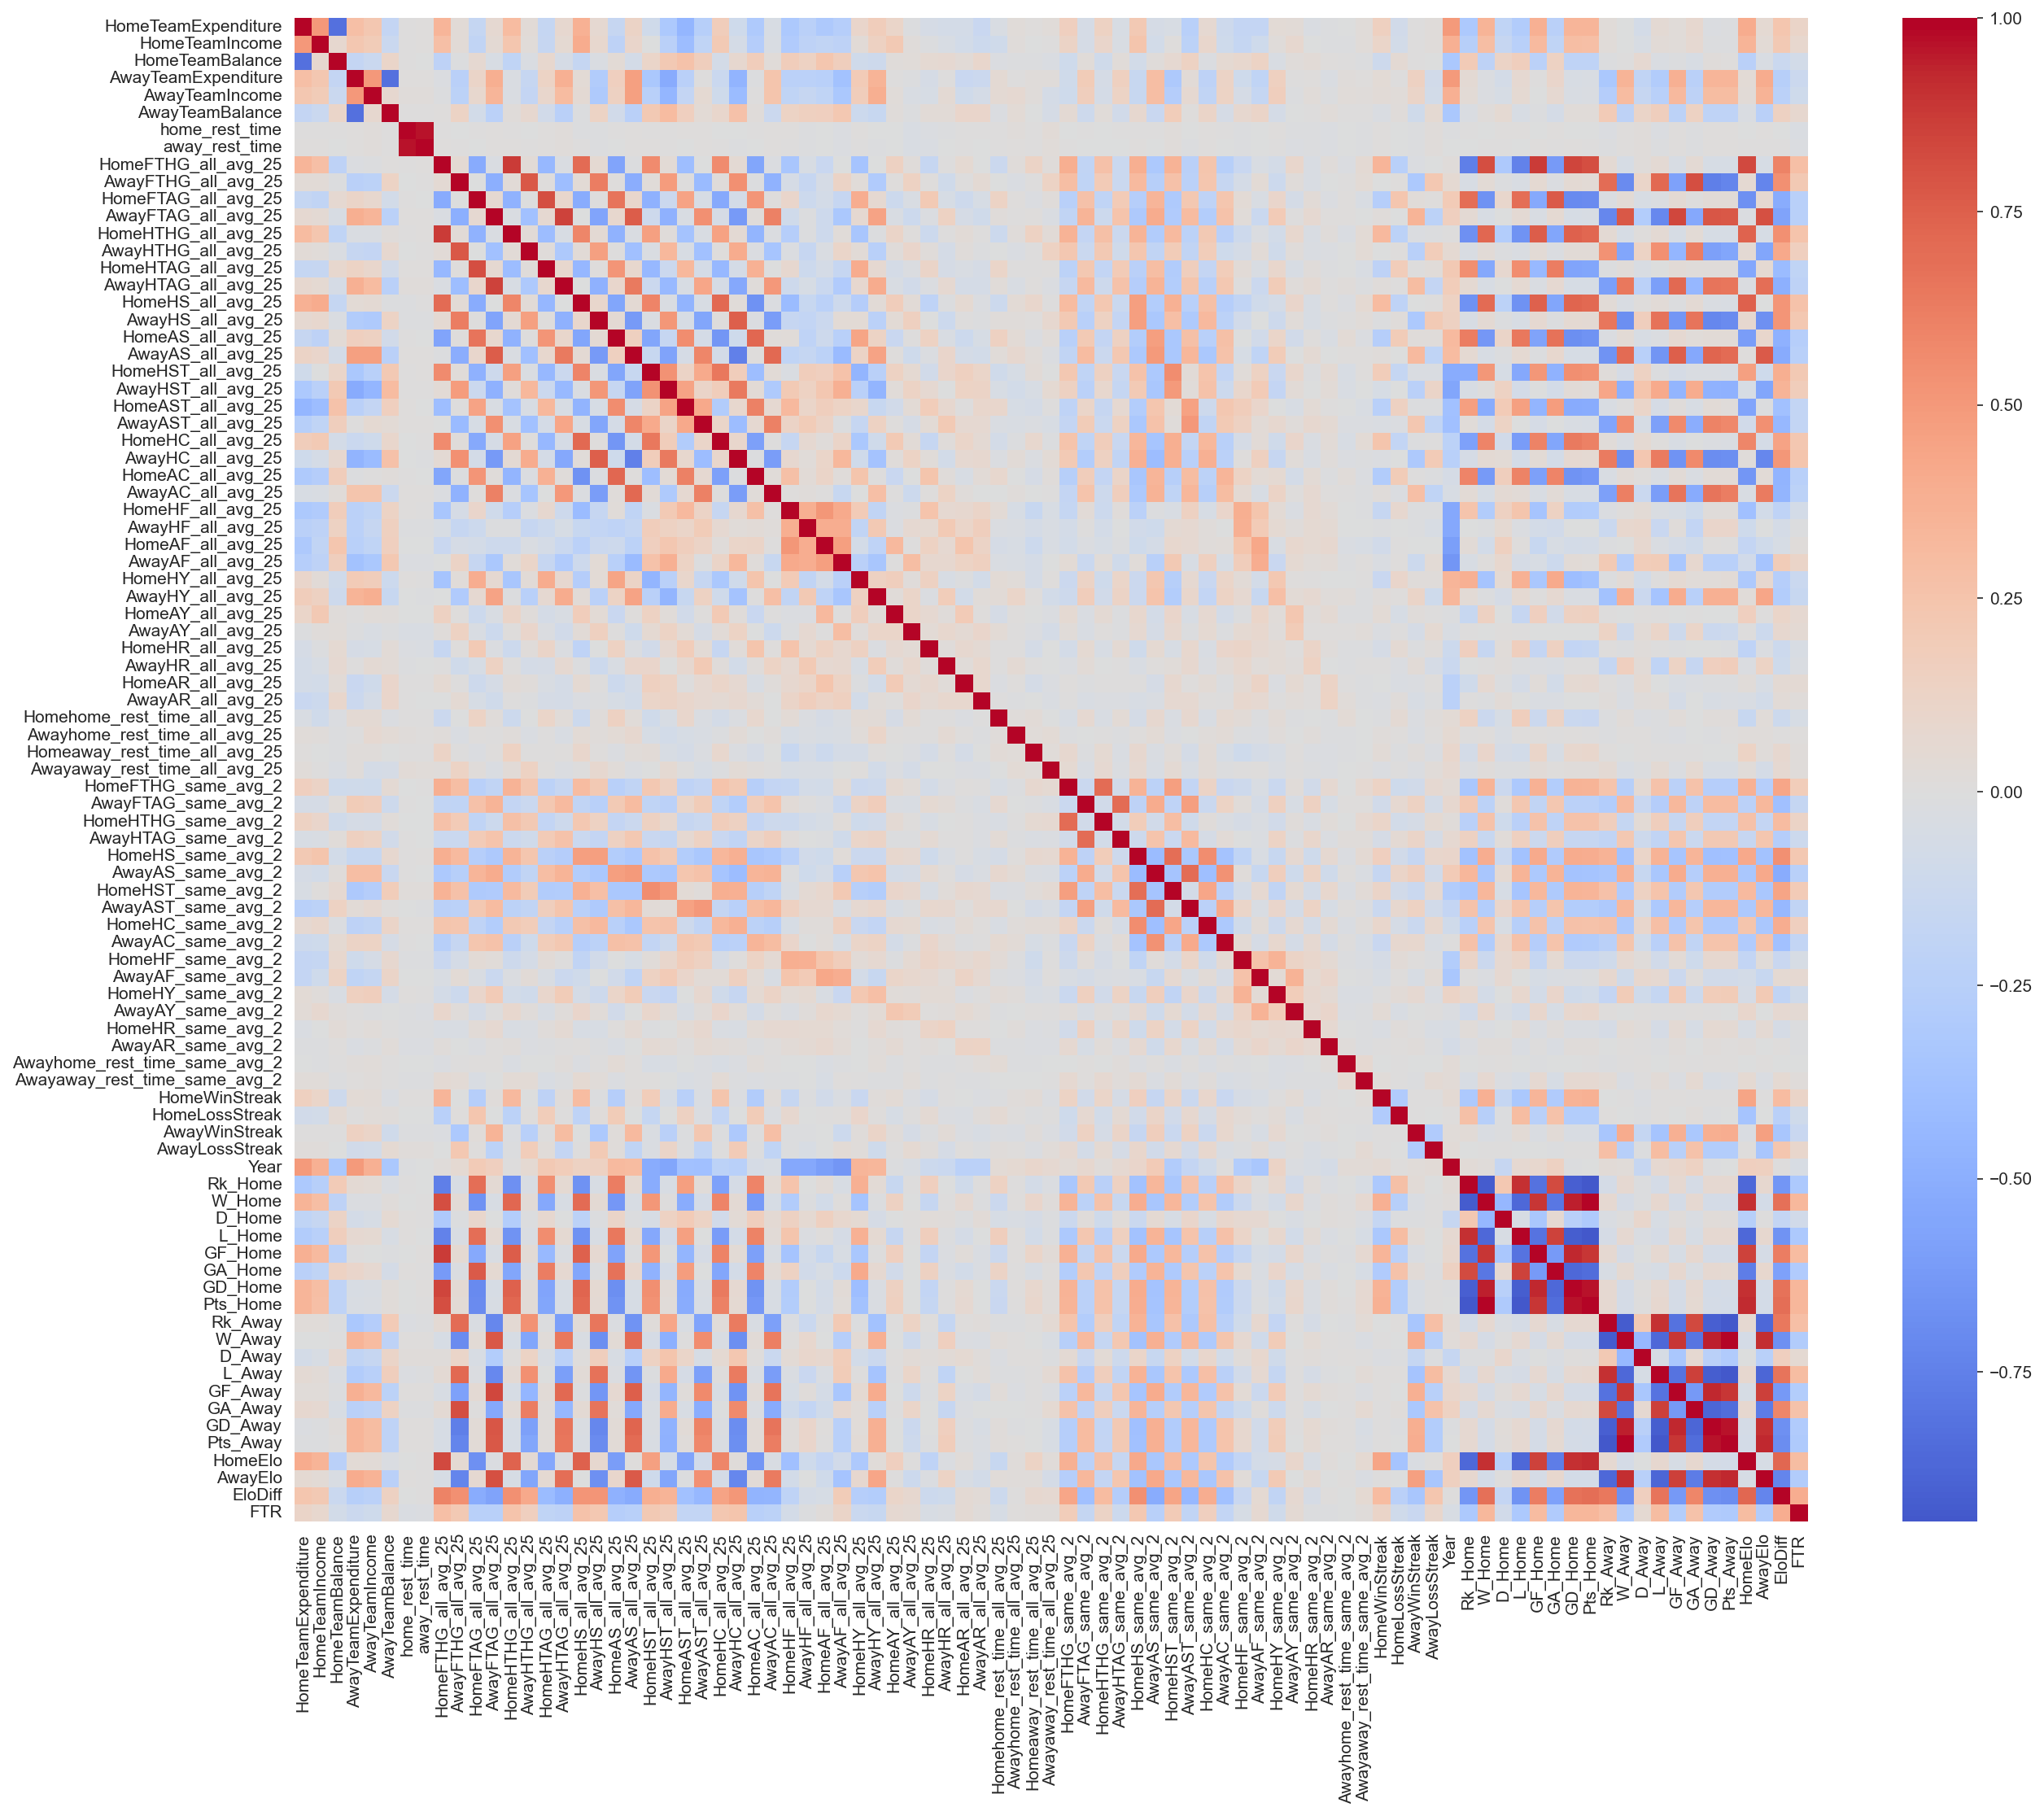

In [62]:
plt.figure(figsize=(20, 16), dpi=150)
sns.heatmap(epl_processed_df_final.drop(['HomeTeam', 'AwayTeam', 'Date'], axis=1).dropna().corr(), annot=False, cmap='coolwarm', center=0)
plt.show()